In [1]:
# Loading the dependency 
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

import os

# Determine the current working directory
current_directory = os.getcwd()

# Go up two directory levels
root_directory = os.path.abspath(os.path.join(current_directory, "..", ".."))

# Set the current working directory to the root directory
os.chdir(root_directory)

# Verify that the current working directory has been updated
os.getcwd()

'/Users/danielalexander/Desktop/Advanced_ML_Algo/adv_ml_algo_assignment_2'

In [3]:
items_weekly_sell_price_df = pd.read_csv('data/raw/items_weekly_sell_prices.csv')
calendar_events_df= pd.read_csv('data/raw/calendar_events.csv')
calendar_df= pd.read_csv('data/raw/calendar.csv')
sales_train_df= pd.read_csv('data/raw/sales_train.csv')
sales_test_df= pd.read_csv('data/raw/sales_test.csv')

In [4]:
items_weekly_sell_price_df_copy=items_weekly_sell_price_df.copy()
calendar_events_df_copy=calendar_events_df.copy()
calendar_df_copy=calendar_df.copy()
sales_train_df_copy= sales_train_df.copy()
sales_test_df_copy= sales_test_df.copy()

In [5]:
# Import Transpose Transformer Class

from src.features.build_features import TransposeTransformer


In [6]:
# Convert wm_yr_wk to string

calendar_df_copy['wm_yr_wk'] = calendar_df_copy['wm_yr_wk'].astype(str)

# Extract 2 digits from the right to get the week
calendar_df_copy['week']=calendar_df_copy['wm_yr_wk'].str[-2:]

# Convert wm_yr_wk to string
calendar_df_copy['wm_yr_wk'] = calendar_df_copy['wm_yr_wk'].astype(int)


In [7]:
calendar_df_copy.head()

,date,wm_yr_wk,d,week
0,2011-01-29,11101,d_1,01
1,2011-01-30,11101,d_2,01
2,2011-01-31,11101,d_3,01
3,2011-02-01,11101,d_4,01
4,2011-02-02,11101,d_5,01


In [8]:
calendar_events_df_copy.head()

,date,event_name,event_type
0,2011-02-06,SuperBowl,Sporting
1,2011-02-14,ValentinesDay,Cultural
2,2011-02-21,PresidentsDay,National
3,2011-03-09,LentStart,Religious
4,2011-03-16,LentWeek2,Religious


In [9]:
items_weekly_sell_price_df_copy.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [10]:
melted_df = pd.melt(sales_train_df_copy, id_vars=['id', 'item_id','dept_id','cat_id','store_id','state_id'], var_name='day', value_name='sales')

In [11]:
melted_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [12]:
merged_df_v1 = pd.merge(melted_df, calendar_df_copy, left_on='day', right_on='d',how='inner')

In [13]:
merged_df_v2 = pd.merge(merged_df_v1, items_weekly_sell_price_df_copy, on=['item_id','store_id','wm_yr_wk'],how='inner')

In [14]:
merged_df_v3 = pd.merge(merged_df_v2, calendar_events_df_copy, on=['date'],how='left')


In [15]:
merged_df_v3['revenue']= merged_df_v3['sales']* merged_df_v3['sell_price']

merged_df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34815174 entries, 0 to 34815173
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          object 
 1   item_id     object 
 2   dept_id     object 
 3   cat_id      object 
 4   store_id    object 
 5   state_id    object 
 6   day         object 
 7   sales       int64  
 8   date        object 
 9   wm_yr_wk    int64  
 10  d           object 
 11  week        object 
 12  sell_price  float64
 13  event_name  object 
 14  event_type  object 
 15  revenue     float64
dtypes: float64(2), int64(2), object(12)
memory usage: 4.2+ GB


In [16]:
#  Group data since its too large for my computer to fit a model



grouped = merged_df_v3.groupby(['date','cat_id','store_id','week'])  # Group the DataFrame by the 'Date' column
grouped_df = grouped['revenue'].mean().reset_index()  # Calculate the sum of 'Value' for each group

In [17]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46230 entries, 0 to 46229
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      46230 non-null  object 
 1   cat_id    46230 non-null  object 
 2   store_id  46230 non-null  object 
 3   week      46230 non-null  object 
 4   revenue   46230 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [18]:
grouped_df.head()

,date,cat_id,store_id,week,revenue
0,2011-01-29,FOODS,CA_1,01,11.529697
1,2011-01-29,FOODS,CA_2,01,10.518170
2,2011-01-29,FOODS,CA_3,01,11.324535
3,2011-01-29,FOODS,CA_4,01,4.949552
4,2011-01-29,FOODS,TX_1,01,6.330689


In [19]:
# Save the DataFrame to a CSV file

merged_df_v3.to_csv('data/interim/merged_df_v3.csv', index=False)
grouped_df.to_csv('data/processed/grouped_df_prediction.csv', index=False)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [21]:
 # Create ohe pipeline steps
    
cat_ohe_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder())
    ]
)

cols_to_be_ohe=['store_id','cat_id','week']


In [22]:
# Creating Column Transformer to transform the features

from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[ 
        ('cat_cols', cat_ohe_transformer, cols_to_be_ohe)
    ]
)

In [23]:
# create a pipeline with
# steps `preprocessor` and another that instantiate
# random forest regressor 

from sklearn.ensemble import RandomForestRegressor

rf_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('rf', RandomForestRegressor(random_state=42))
    ]
)

In [24]:
# Split training and validation

from sklearn.model_selection import train_test_split


y=grouped_df.pop('revenue')


X_train, X_test, y_train, y_test = train_test_split(
    grouped_df, y, test_size=0.1, random_state=42
)

In [25]:
# Fit `rf_pipe` with `df_cleaned`

rf_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_cols',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['store_id', 'cat_id',
                                                   'week'])])),
                ('rf', RandomForestRegressor(random_state=42))])

In [26]:
#  Saving model

from joblib import dump

dump(rf_pipe,'models/predictive/rf_1_pipeline.joblib')

['models/predictive/rf_1_pipeline.joblib']

In [29]:
train_predict=rf_pipe.predict(X_train)
test_predict=rf_pipe.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error


mae_train = mean_absolute_error(y_train, train_predict)
mae_test = mean_absolute_error(y_test, test_predict)
print(f"MAE for train: {mae_train} - MAE for test:{mae_test}")

MAE for train: 0.7319614594115664 - MAE for test:0.7667440922577484


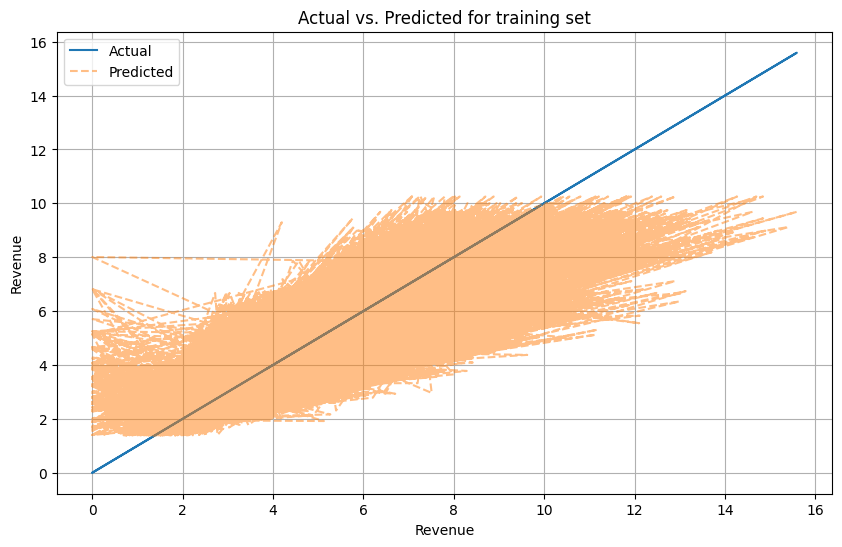

In [46]:
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your real and predicted values
plt.figure(figsize=(10, 6))

plt.plot(y_train, y_train, label='Actual', linestyle='-')

# Plot the predicted values against the diagonal line
plt.plot(y_train, train_predict, label='Predicted', linestyle= '--',alpha=0.5)

# Add labels, title, legend, and grid
plt.xlabel('Revenue')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted for training set')
plt.legend()

# Show a grid for better visualization
plt.grid(True)

# Display the plot
plt.show()

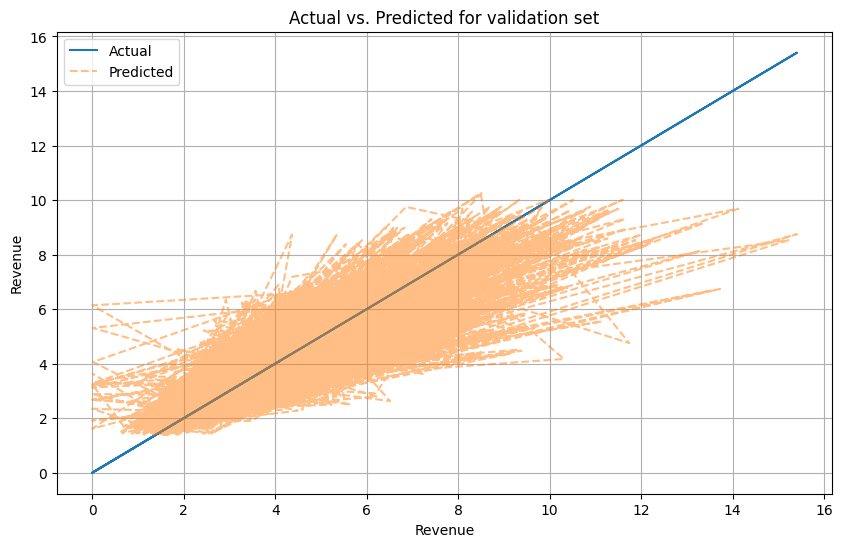

In [45]:
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your real and predicted values
plt.figure(figsize=(10, 6))

plt.plot(y_test, y_test, label='Actual', linestyle='-')

# Plot the predicted values against the diagonal line
plt.plot(y_test, test_predict, label='Predicted', linestyle= '--',alpha=0.5)

# Add labels, title, legend, and grid
plt.xlabel('Revenue')
plt.ylabel('Revenue')
plt.title('Actual vs. Predicted for validation set')
plt.legend()

# Show a grid for better visualization
plt.grid(True)

# Display the plot
plt.show()